## Importing standard libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

 ## Reading data

In [2]:
cData=pd.read_csv('Data-Parkinsons.csv')
cData.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[5 rows x 24 columns]

## Names of the variables and shape of the data set.

In [3]:
print(cData.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


## Checking the presence of missing values.

In [4]:
cData.isnull().values.any()

False

In [5]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## 5 point summary

In [6]:
cData.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

## Get the target column distribution.

Target Variable is 'Status'. 
There is no need for 'name' column for further analysis since 'name' is just series alphanumeric variables

## Univariate Analysis

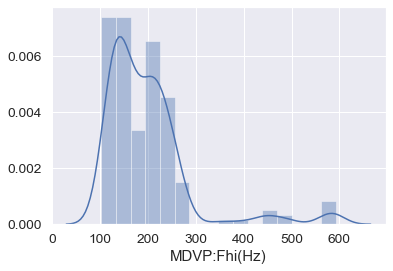

In [17]:
sns.distplot(cData['MDVP:Fhi(Hz)'])

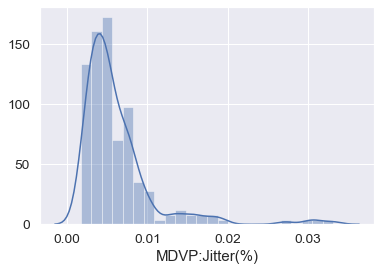

In [22]:
sns.distplot(cData['MDVP:Jitter(%)'])

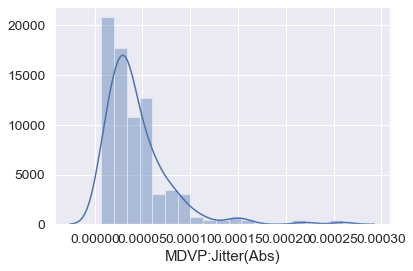

In [23]:
sns.distplot(cData['MDVP:Jitter(Abs)'])

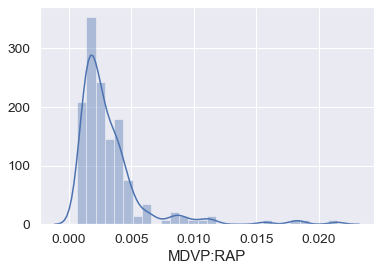

In [24]:
sns.distplot(cData['MDVP:RAP'])

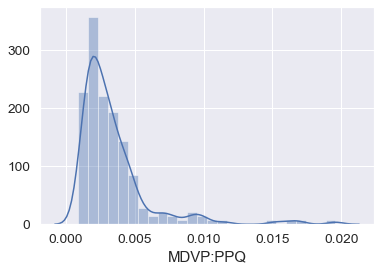

In [25]:
sns.distplot(cData['MDVP:PPQ'])

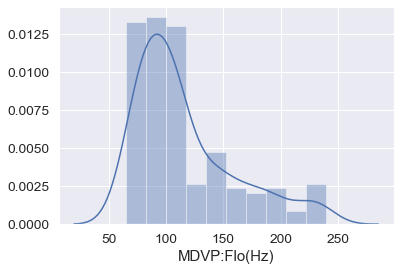

In [26]:
sns.distplot(cData['MDVP:Flo(Hz)'])

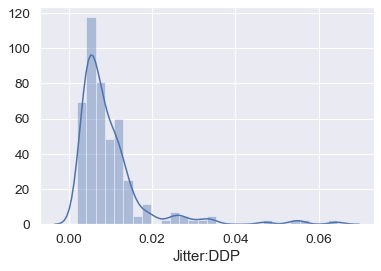

In [27]:
sns.distplot(cData['Jitter:DDP'])

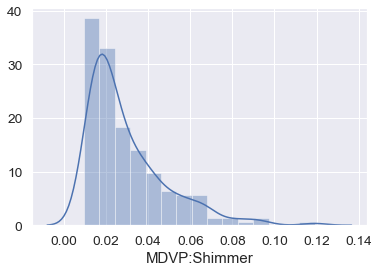

In [28]:
sns.distplot(cData['MDVP:Shimmer'])

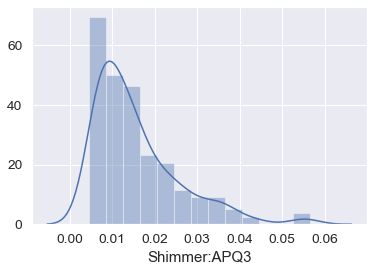

In [29]:
sns.distplot(cData['Shimmer:APQ3'])

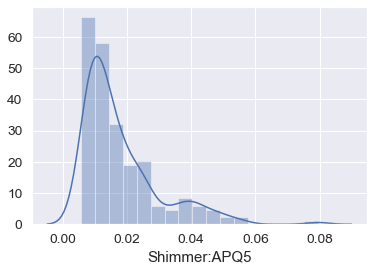

In [30]:
sns.distplot(cData['Shimmer:APQ5'])

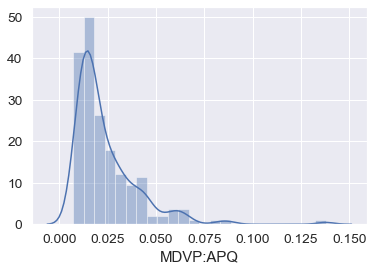

In [31]:
sns.distplot(cData['MDVP:APQ']) 

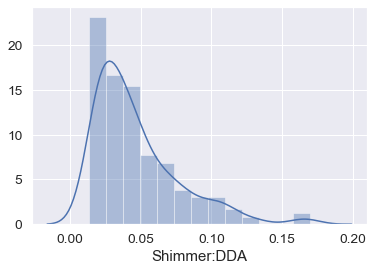

In [32]:
sns.distplot(cData['Shimmer:DDA'])

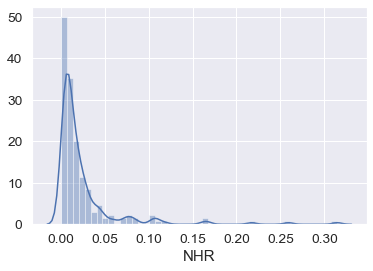

In [33]:
sns.distplot(cData['NHR'])

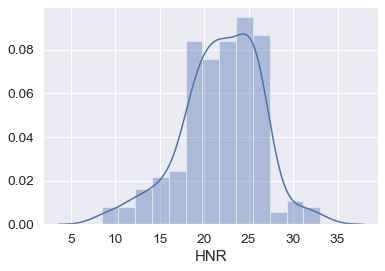

In [34]:
sns.distplot(cData['HNR'])

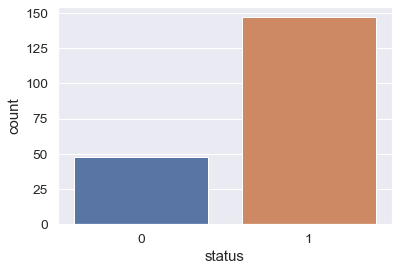

In [35]:
sns.countplot(cData['status'])

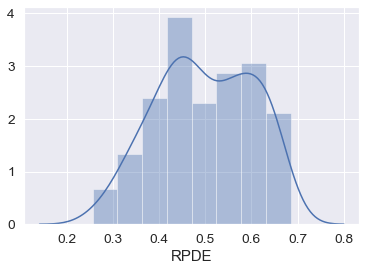

In [36]:
sns.distplot(cData['RPDE'])

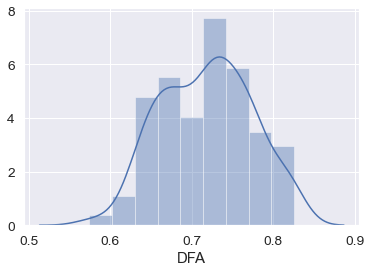

In [37]:
sns.distplot(cData['DFA'])

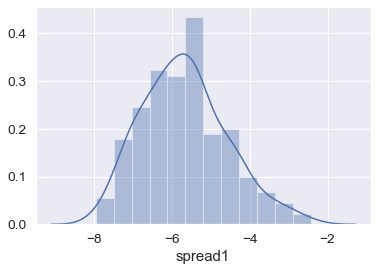

In [38]:
sns.distplot(cData['spread1'])

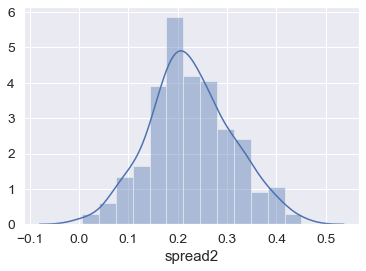

In [39]:
sns.distplot(cData['spread2'])

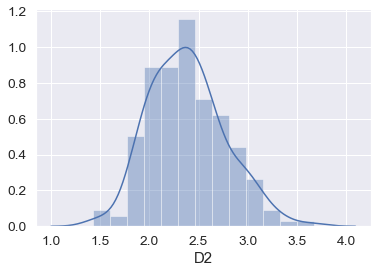

In [40]:
sns.distplot(cData['D2'])

## Understanding the relationship of the variables.

It is optimal that we can use heat map to find the correlations coefficient values. We will remove the less correlation coefficient columns. We can remove the irrelavant features it will minimize the accuracy of an algorithm. It will be better if we take relavent features columns then we can achive to get good accuracy..

In [42]:
# correlation coefficient values in each attributes.
correlation_values=cData.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

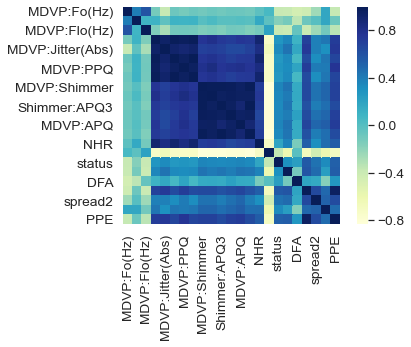

In [46]:
corr_map=cData.corr()
sns.heatmap(corr_map,square=True,cmap="YlGnBu")

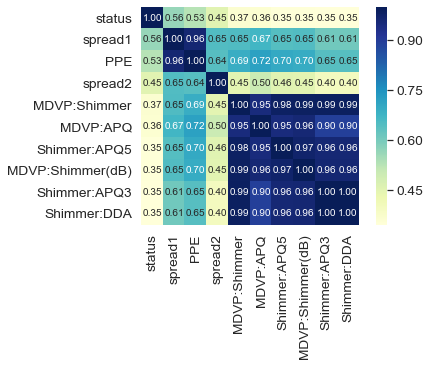

In [45]:
# K value means how many features required to see in heat map
k=10

# finding the columns which related to output attribute and we are arranging from top coefficient correlation value to downwards.
cols=corr_map.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(cData[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',cmap="YlGnBu",
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

## Bivariate Analysis

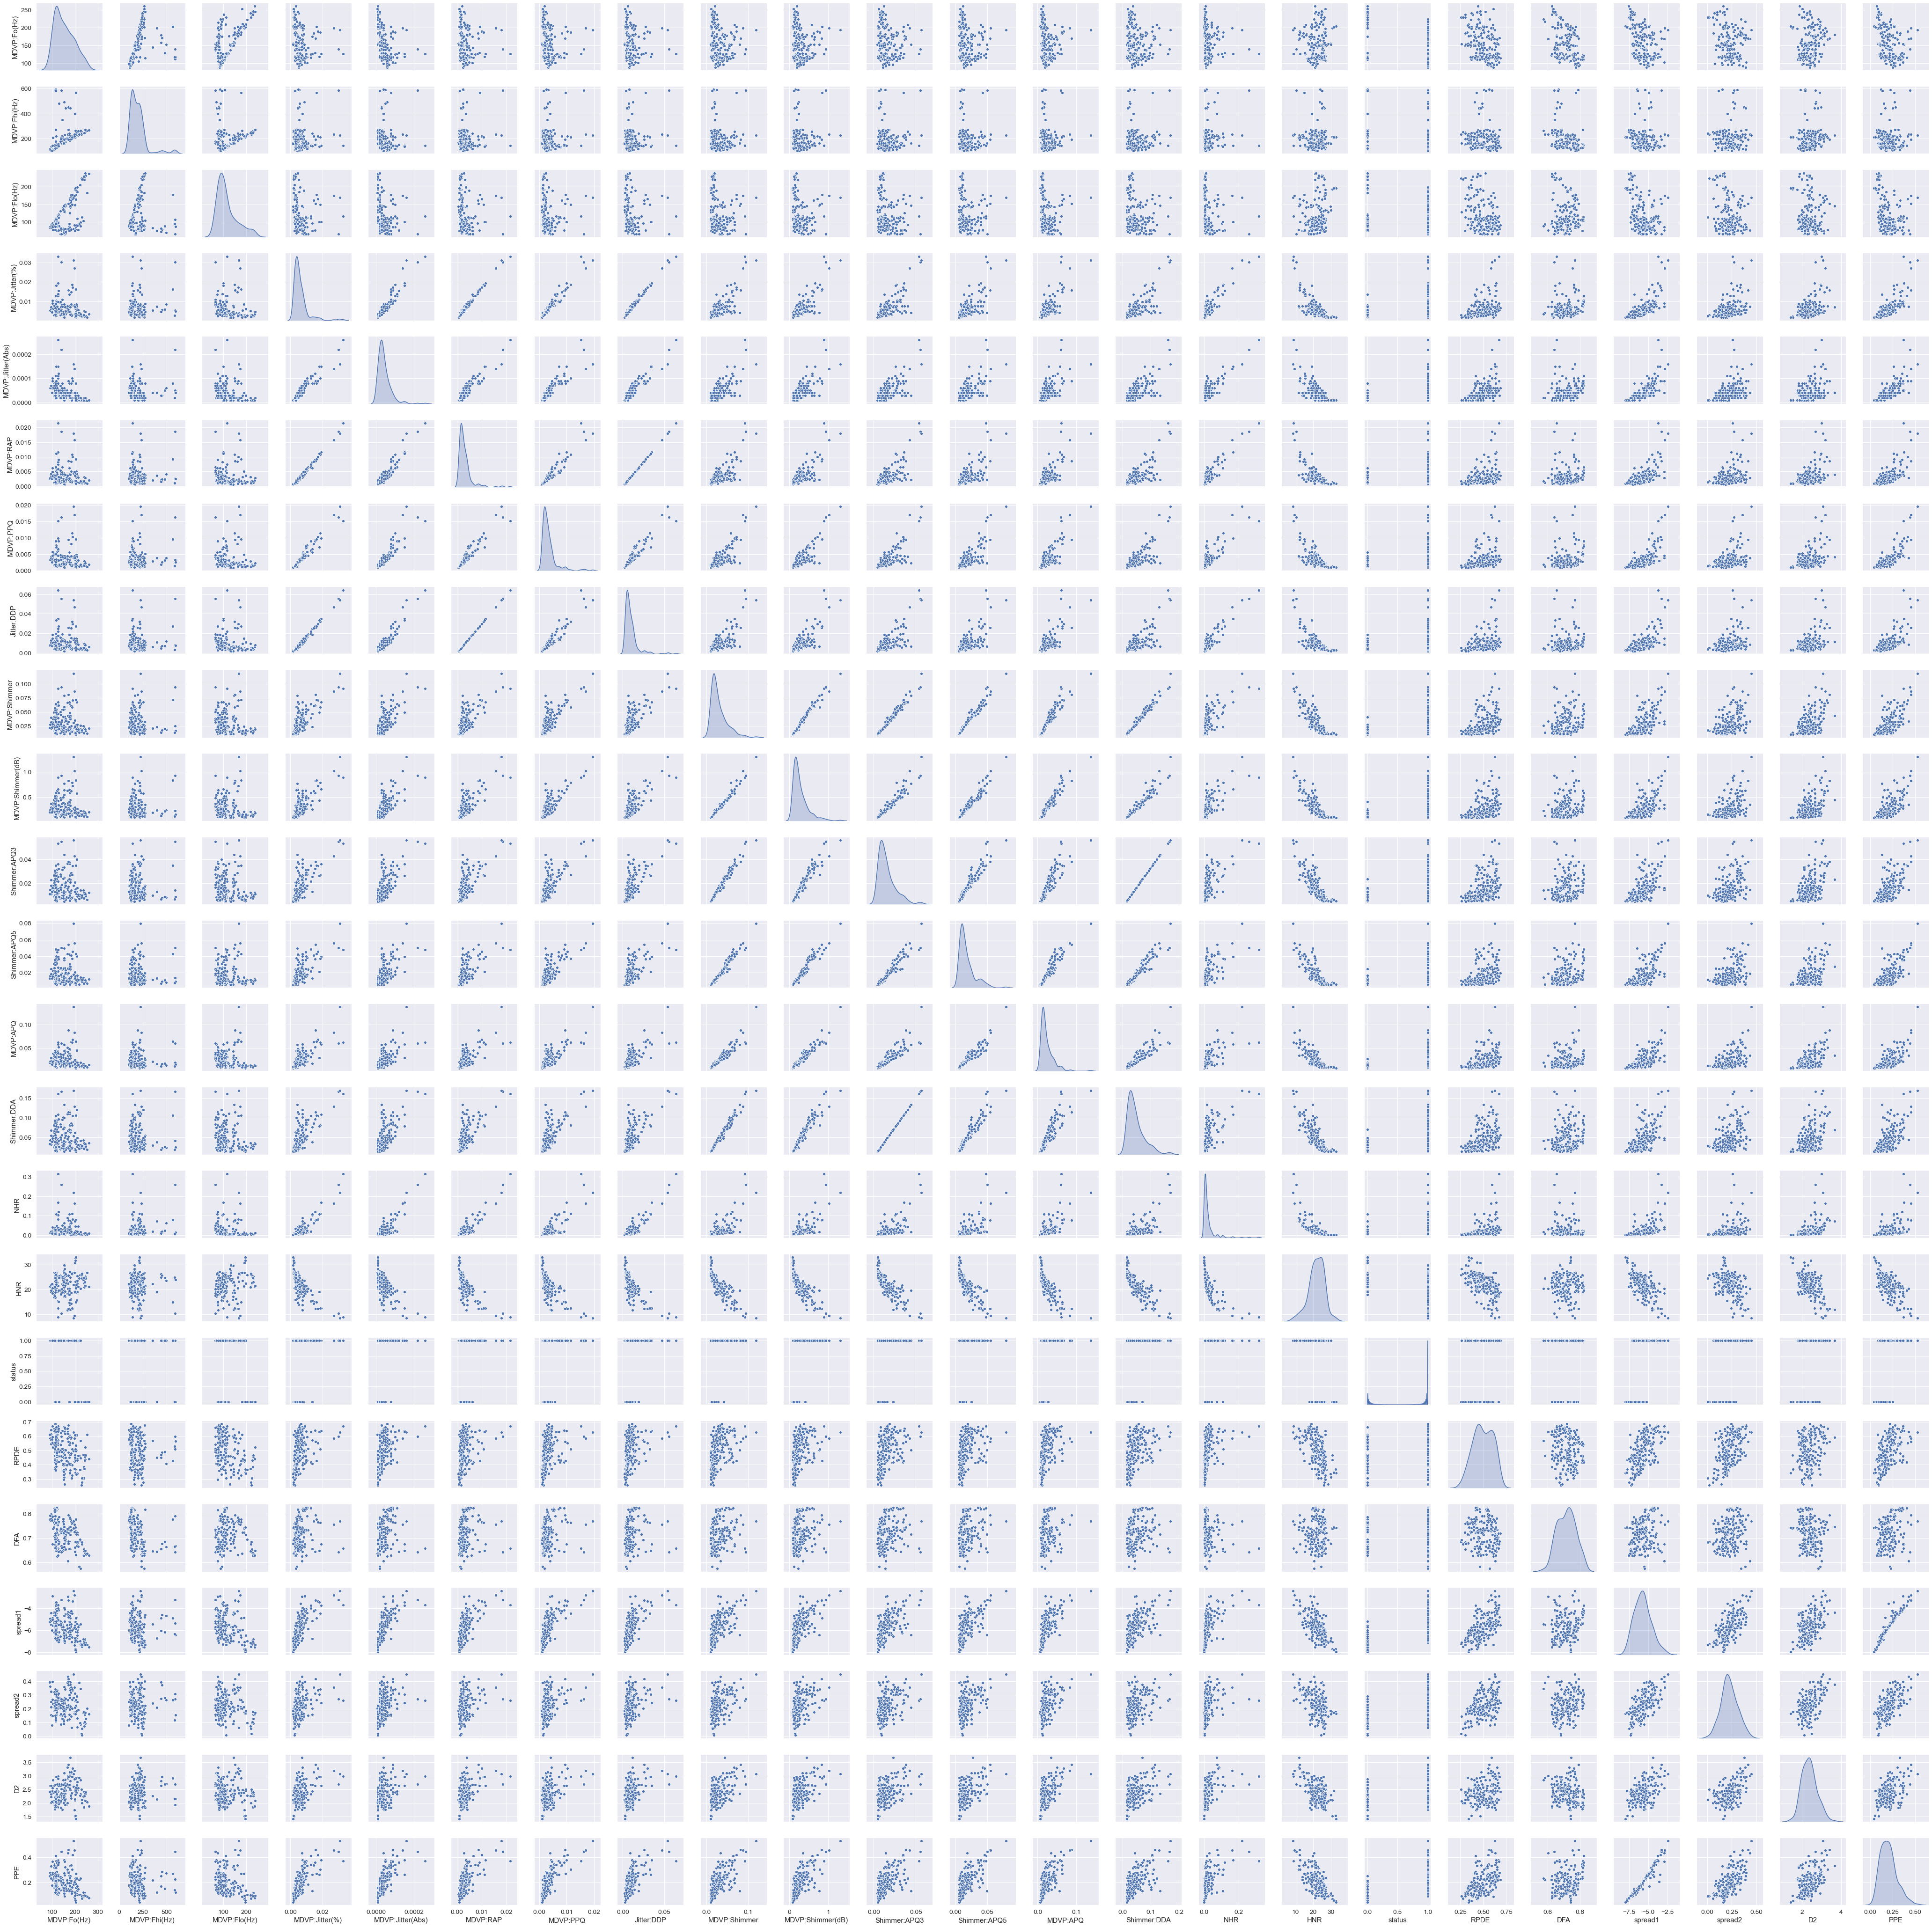

In [47]:
#Distribution of columns.
sns.pairplot(cData[["name","MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3",
 "Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"]], diag_kind='kde')

## Dropping columns.

In [48]:
# Dropping columns which are highly correlated among each other. 
cData.drop('name',axis=1,inplace=True)
cData.drop('Jitter:DDP',axis=1,inplace=True)
cData.drop('DFA',axis=1,inplace=True)
cData.drop('NHR',axis=1,inplace=True)
cData.drop('MDVP:Fhi(Hz)',axis=1,inplace=True)

## Split the dataset into training and test set in the ratio of 70:30

In [49]:
from sklearn.model_selection import train_test_split

X = cData.drop('status',axis=1)     # Predictor feature columns 
Y = cData['status']   # Predicted class (1=True, 0=False) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
42       237.226       225.227         0.00298           0.00001   0.00169   
17       168.778        75.603         0.00718           0.00004   0.00284   
5        120.552       113.787         0.00968           0.00008   0.00463   
120      128.940        88.251         0.00581           0.00005   0.00241   
98       125.791        96.206         0.01378           0.00011   0.00826   

     MDVP:PPQ  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
42    0.00182       0.01752             0.164       0.01035       0.01024   
17    0.00387       0.03327             0.348       0.01441       0.01893   
5     0.00750       0.04701             0.456       0.02328       0.03526   
120   0.00314       0.02008             0.221       0.00849       0.01117   
98    0.00655       0.04689             0.422       0.02542       0.02630   

     MDVP:APQ  Shimmer:DDA     HNR      RPDE   spread1   spread2        D2  \
42    0.01133      0.03104  22.736  0.305062 -7.310550  0.098648  2.416838   
17    0.03430      0.04322  20.376  0.631099 -2.931070  0.434326  3.007463   
5     0.03243      0.06985  21.378  0.415564 -4.242867  0.299111  2.187560   
120   0.01734      0.02548  24.743  0.487756 -6.186128  0.279933  2.686240   
98    0.03908      0.07625  15.433  0.571010 -5.159169  0.202146  2.441612   

          PPE  
42   0.095032  
17   0.430788  
5    0.357775  
120  0.152428  
98   0.260375

In [52]:
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
0      237.226       225.227         0.00298           0.00001   0.00169   
1      168.778        75.603         0.00718           0.00004   0.00284   
2      120.552       113.787         0.00968           0.00008   0.00463   
3      128.940        88.251         0.00581           0.00005   0.00241   
4      125.791        96.206         0.01378           0.00011   0.00826   

   MDVP:PPQ  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0   0.00182       0.01752             0.164       0.01035       0.01024   
1   0.00387       0.03327             0.348       0.01441       0.01893   
2   0.00750       0.04701             0.456       0.02328       0.03526   
3   0.00314       0.02008             0.221       0.00849       0.01117   
4   0.00655       0.04689             0.422       0.02542       0.02630   

   MDVP:APQ  Shimmer:DDA     HNR      RPDE   spread1   spread2        D2  \
0   0.01133      0.03104  22.736  0.305062 -7.310550  0.098648  2.416838   
1   0.03430      0.04322  20.376  0.631099 -2.931070  0.434326  3.007463   
2   0.03243      0.06985  21.378  0.415564 -4.242867  0.299111  2.187560   
3   0.01734      0.02548  24.743  0.487756 -6.186128  0.279933  2.686240   
4   0.03908      0.07625  15.433  0.571010 -5.159169  0.202146  2.441612   

        PPE  
0  0.095032  
1  0.430788  
2  0.357775  
3  0.152428  
4  0.260375

## Train at least 3 standard classification algorithms - Logistic Regression,
## Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data.

## 1.Logistic Regression.

In [53]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3        4         5         6  \
0 -0.012963 -0.001277  0.007513  0.000066  0.00741  0.006545  0.110842   

          7         8         9        10        11        12       13  \
0  1.049264  0.059919  0.067636  0.086584  0.179732  0.081816  0.53297   

         14        15        16        17  intercept  
0  0.952267  0.445513  2.576728  0.561887   0.754797  


## Score of the Model.

In [54]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7966101694915254


## Confusion Matrix of the model.

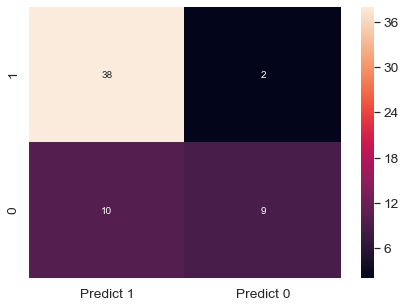

In [55]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

## Classification Report

In [56]:
print("Classification Report")
print(metrics.classification_report(y_test,y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.95      0.86        40
           0       0.82      0.47      0.60        19

    accuracy                           0.80        59
   macro avg       0.80      0.71      0.73        59
weighted avg       0.80      0.80      0.78        59



## 2.KNN Classifier

In [58]:
cData.groupby(["status"]).count()

MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  \
status                                                                          
0                48            48              48                48        48   
1               147           147             147               147       147   

        MDVP:PPQ  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
status                                                                         
0             48            48                48            48            48   
1            147           147               147           147           147   

        MDVP:APQ  Shimmer:DDA  HNR  RPDE  spread1  spread2   D2  PPE  
status                                                                
0             48           48   48    48       48       48   48   48  
1            147          147  147   147      147      147  147  147

In [57]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

MDVP:Fo(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
count  1.950000e+02  1.950000e+02    1.950000e+02      1.950000e+02   
mean  -2.277381e-18  6.148928e-17   -2.127927e-17      2.562053e-18   
std    1.002574e+00  1.002574e+00    1.002574e+00      1.002574e+00   
min   -1.596162e+00 -1.171366e+00   -9.389487e-01     -1.064103e+00   
25%   -8.879183e-01 -7.379376e-01   -5.708520e-01     -6.898141e-01   
50%   -1.317379e-01 -2.766579e-01   -2.647942e-01     -4.018994e-01   
75%    6.913210e-01  5.458200e-01    2.366858e-01      4.618447e-01   
max    2.564598e+00  2.829908e+00    5.570985e+00      6.220139e+00   

           MDVP:RAP      MDVP:PPQ  MDVP:Shimmer  MDVP:Shimmer(dB)  \
count  1.950000e+02  1.950000e+02  1.950000e+02      1.950000e+02   
mean  -1.380662e-16  9.351494e-17  2.829645e-16     -1.369275e-16   
std    1.002574e+00  1.002574e+00  1.002574e+00      1.002574e+00   
min   -8.872543e-01 -9.180440e-01 -1.072340e+00     -1.014787e+00   
25%   -5.561906e-01 -5.764609e-01 -7.020291e-01     -6.881025e-01   
50%   -2.724216e-01 -2.748504e-01 -3.583019e-01     -3.151160e-01   
75%    1.785683e-01  1.848331e-01  4.346898e-01      3.485429e-01   
max    6.125892e+00  5.862742e+00  4.751617e+00      5.246243e+00   

       Shimmer:APQ3  Shimmer:APQ5      MDVP:APQ   Shimmer:DDA           HNR  \
count  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02   
mean   8.255505e-17  1.930080e-16 -8.824850e-17 -1.577086e-16  9.123756e-16   
std    1.002574e+00  1.002574e+00  1.002574e+00  1.002574e+00  1.002574e+00   
min   -1.097467e+00 -1.015461e+00 -9.993055e-01 -1.097815e+00 -3.045707e+00   
25%   -7.326044e-01 -6.919345e-01 -6.508513e-01 -7.326182e-01 -6.089102e-01   
50%   -2.838083e-01 -3.675741e-01 -3.444009e-01 -2.841460e-01  4.508553e-02   
75%    4.543106e-01  3.753694e-01  3.146448e-01  4.543110e-01  7.225273e-01   
max    4.029374e+00  5.129875e+00  6.726438e+00  4.029746e+00  2.528321e+00   

               RPDE       spread1       spread2            D2           PPE  
count  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02  1.950000e+02  
mean  -1.913000e-16  1.184451e-15 -1.429056e-16 -6.117614e-16 -2.960595e-17  
std    1.002574e+00  1.002574e+00  1.002574e+00  1.002574e+00  1.002574e+00  
min   -2.333888e+00 -2.097268e+00 -2.647338e+00 -2.510472e+00 -1.802384e+00  
25%   -7.449206e-01 -7.041503e-01 -6.269844e-01 -7.404100e-01 -7.687420e-01  
50%   -2.490033e-02 -3.353960e-02 -9.166005e-02 -5.315145e-02 -1.390580e-01  
75%    8.587132e-01  5.869042e-01  6.337615e-01  6.668912e-01  5.165137e-01  
max    1.800007e+00  2.989093e+00  2.692370e+00  3.376831e+00  3.569059e+00

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=42)

In [62]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [63]:
NNH.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Score of the Model.

In [64]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, Y_test)

0.9152542372881356

## Confusion Matrix of the model.

In [66]:
cd=confusion_matrix(Y_test, predicted_labels)
print("confusion matirx of KNN classifier = \n",cd)

confusion matirx of KNN classifier = 
 [[10  5]
 [ 0 44]]


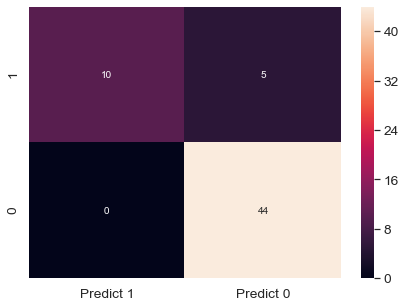

In [67]:
knnm=metrics.confusion_matrix(Y_test, predicted_labels)
knn_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

## Classification Report of the model.

In [68]:
print("Classification Report")
print(metrics.classification_report(Y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        44
           0       1.00      0.67      0.80        15

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



## 3.SVM classifier

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

In [70]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)

prediction = svc_model .predict(x_test)

## Score of the model.

In [71]:
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.8529411764705882
0.8983050847457628


## Confusion Matrix for this model.

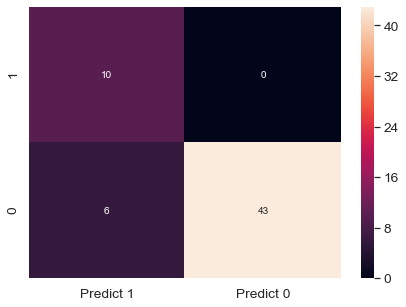

In [72]:
knnm=metrics.confusion_matrix(prediction,y_test)
knn_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

## Classification Report for this model.

In [73]:
print("Classification Report")
print(metrics.classification_report(prediction,y_test, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        49
           0       0.62      1.00      0.77        10

    accuracy                           0.90        59
   macro avg       0.81      0.94      0.85        59
weighted avg       0.94      0.90      0.91        59



In [75]:
svc_model = SVC(kernel='rbf')
svc_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
svc_model  = SVC(kernel='poly')
svc_model.fit(x_train, y_train)

prediction = svc_model.predict(x_test)

print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.8823529411764706
0.7966101694915254


In [77]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(x_train, y_train)

prediction = svc_model.predict(x_test)

print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.7647058823529411
0.7288135593220338


## 4.Decision Tree

In [78]:
feature_cols = ['MDVP:Fo(Hz)',' MDVP:Flo(Hz)','MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Shimmer',
                'MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','HNR','RPDE','spread1','spread2','D2','PPE']
clf = DecisionTreeClassifier()

clf=clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

## Accuracy Check for the model.

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.847457627118644


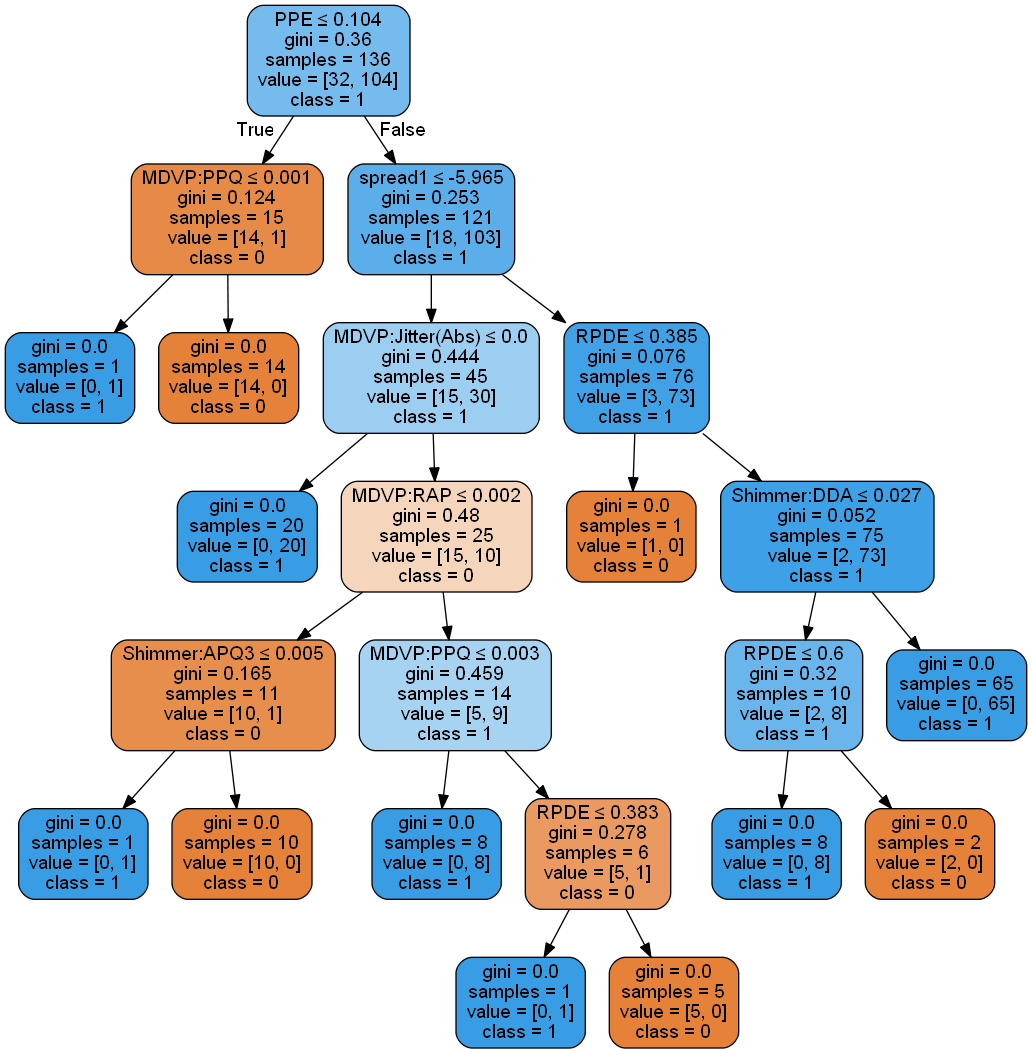

In [85]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cd.png')
Image(graph.create_png())

In [86]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864406779661017


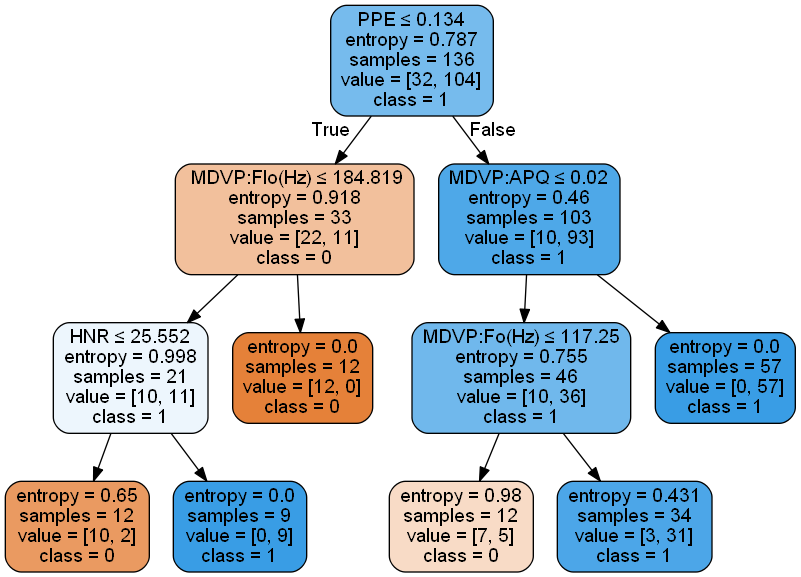

In [87]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cd1.png')
Image(graph.create_png())

## Train at least one standard Ensemble model - Random forest, Bagging,Boosting etc, and note the accuracy

## 1.Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators = 50)
randf = randf.fit(x_train, y_train)

In [89]:
predrandf= randf.predict(x_test)
accrandf = accuracy_score(y_test, predrandf)
print(accrandf)

0.9152542372881356


## 2.AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8983050847457628


## 3.Bagging Classifier

In [93]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bag= bag.fit(x_train, y_train)

In [94]:
predBAG =bag.predict(x_test)
accBAG = accuracy_score(y_test, predBAG)
print(accBAG)

0.9491525423728814


## 4.GradientBoost Classifier

In [95]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
grad = grad.fit(x_train, y_train)

In [96]:
predgrad =grad.predict(x_test)
accgrad = accuracy_score(y_test, predgrad)
print(accgrad)

0.9491525423728814


## Train a meta-classifier and note the accuracy on test data

## Stacking classifier

In [99]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 =SVC(C= .1, kernel='linear', gamma= 1)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
print('3-fold cross validation:\n')
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, Y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.80 (+/- 0.03) [KNN]
Accuracy: 0.81 (+/- 0.03) [Random Forest]
Accuracy: 0.84 (+/- 0.06) [Naive Bayes]
Accuracy: 0.83 (+/- 0.04) [StackingClassifier]


## Compare all the models (minimum 5) and pick the best one among them.

>lr 0.864 (0.036)
>knn 0.928 (0.030)
>cart 0.815 (0.028)
>svm 0.922 (0.029)
>bayes 0.831 (0.040)


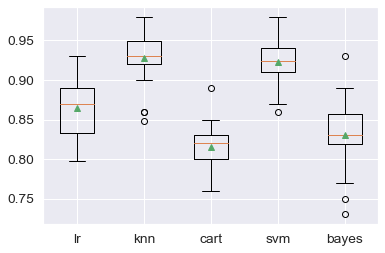

In [114]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>ab 0.866 (0.033)
>bc 0.928 (0.030)
>gb 0.920 (0.027)


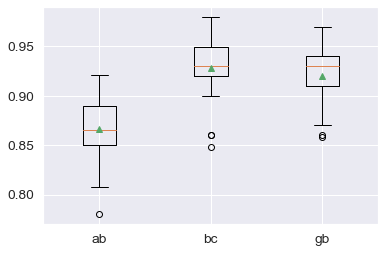

In [119]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['ab'] = AdaBoostClassifier()
	models['bc'] = KNeighborsClassifier()
	models['gb'] = GradientBoostingClassifier()

	return models

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Conclusion

On performing several analysis on the given dataset,
I conclude that the Gradient Boosting Classifier method is the most accurate for analysis with accuracy of 0.9491525423728814